In [2]:
from google.colab import auth                    # Other necessary packages
from oauth2client.client import GoogleCredentials
!pip install pydrive                             # Package to use Google Drive API - not installed in Colab VM by default
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
%matplotlib inline

In [0]:
auth.authenticate_user()                         # Follow prompt in the authorization process
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

In [0]:
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({'id':'1H-qGCzZA6JmlKpUnRky3HySPO4suAQUK'})

your_module.GetContentFile("model_architecture.py") 

In [0]:
import model_architecture

In [11]:
transform = model_architecture.transforms.Compose(
    [model_architecture.transforms.ToTensor(),
     model_architecture.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = model_architecture.torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = model_architecture.torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = model_architecture.torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = model_architecture.torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 deer   dog  frog horse


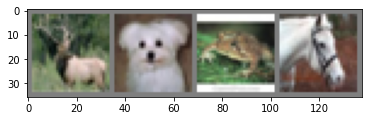

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(model_architecture.torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [17]:
!pip install torchsummary
from torchsummary import summary
use_cuda = model_architecture.torch.cuda.is_available()
device = model_architecture.torch.device("cuda" if use_cuda else "cpu")
model = model_architecture.Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 30, 30]          73,728
       BatchNorm2d-6          [-1, 128, 30, 30]             256
              ReLU-7          [-1, 128, 30, 30]               0
           Dropout-8          [-1, 128, 30, 30]               0
            Conv2d-9          [-1, 256, 30, 30]         294,912
      BatchNorm2d-10          [-1, 256, 30, 30]             512
             ReLU-11          [-1, 256, 30, 30]               0
          Dropout-12          [-1, 256, 30, 30]               0
        MaxPool2d-13          [-1, 256, 15, 15]               0
           Conv2d-14          [-1, 256,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim

criterion = model_architecture.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [24]:
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.612
[1,  4000] loss: 1.444
[1,  6000] loss: 1.332
[1,  8000] loss: 1.236
[1, 10000] loss: 1.201
[1, 12000] loss: 1.105
[2,  2000] loss: 1.040
[2,  4000] loss: 1.013
[2,  6000] loss: 0.969
[2,  8000] loss: 0.948
[2, 10000] loss: 0.907
[2, 12000] loss: 0.873
[3,  2000] loss: 0.814
[3,  4000] loss: 0.814
[3,  6000] loss: 0.799
[3,  8000] loss: 0.778
[3, 10000] loss: 0.759
[3, 12000] loss: 0.759
[4,  2000] loss: 0.700
[4,  4000] loss: 0.695
[4,  6000] loss: 0.699
[4,  8000] loss: 0.688
[4, 10000] loss: 0.672
[4, 12000] loss: 0.679
[5,  2000] loss: 0.616
[5,  4000] loss: 0.611
[5,  6000] loss: 0.632
[5,  8000] loss: 0.619
[5, 10000] loss: 0.609
[5, 12000] loss: 0.598
[6,  2000] loss: 0.539
[6,  4000] loss: 0.554
[6,  6000] loss: 0.582
[6,  8000] loss: 0.536
[6, 10000] loss: 0.543
[6, 12000] loss: 0.557
[7,  2000] loss: 0.503
[7,  4000] loss: 0.501
[7,  6000] loss: 0.502
[7,  8000] loss: 0.494
[7, 10000] loss: 0.523
[7, 12000] loss: 0.496
[8,  2000] loss: 0.443
[8,  4000] 

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane


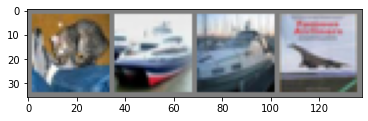

In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(model_architecture.torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
CPUmodel=model_architecture.Net()
CPUmodel.load_state_dict(model.cpu().state_dict())


outputs = CPUmodel(images)

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [32]:
_, predicted = model_architecture.torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [34]:
correct = 0
total = 0
with model_architecture.torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CPUmodel(images)
        _, predicted = model_architecture.torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 83 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [37]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with model_architecture.torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CPUmodel(images)
        _, predicted = model_architecture.torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 91 %
Accuracy of  bird : 79 %
Accuracy of   cat : 63 %
Accuracy of  deer : 87 %
Accuracy of   dog : 72 %
Accuracy of  frog : 92 %
Accuracy of horse : 83 %
Accuracy of  ship : 87 %
Accuracy of truck : 89 %
